# Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Count : Shows the total number.
Mean : Shows the average.
Std : Standard deviation value
Min : Minimum value
%25 : First Quantile
%50 : Median or Second Quantile
%75 : Third Quantile
Max : Maximum value
What is quantile?

1,4,5,6,7,11,12,13,14,15,16,17
The median is the number that is in middle of the sequence. In this case It would be 11
The lower quartile is the median in between the smallest number and the median etc in between 1 and 11, which is 6
The upper quartile you find the median between the median and the largest number etc. betweeb 11 and 17,which will be 14 according to the question above.

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# DATA VISUALISATION-->

In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


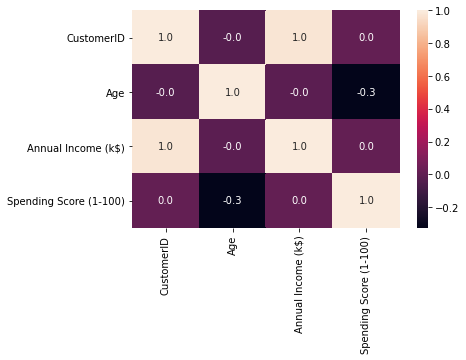

In [9]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

# We dont need Customer I column so dropping the Customer ID Column.

In [10]:
df.drop('CustomerID',axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

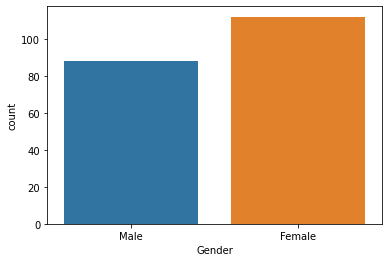

In [13]:
sns.countplot(df['Gender'])

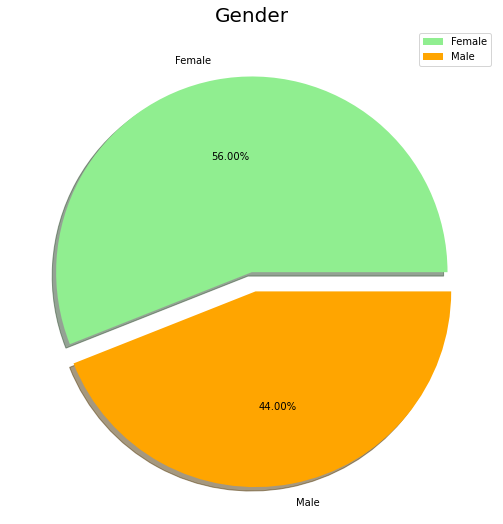

In [14]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#  The Females are in the lead with a share of 56% whereas the Males have a share of 44%

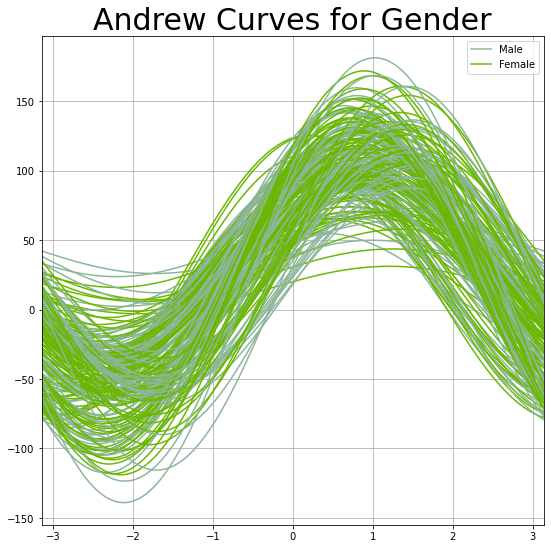

In [15]:
plotting.andrews_curves(df, "Gender")
plt.title('Andrew Curves for Gender', fontsize = 30)
plt.show()

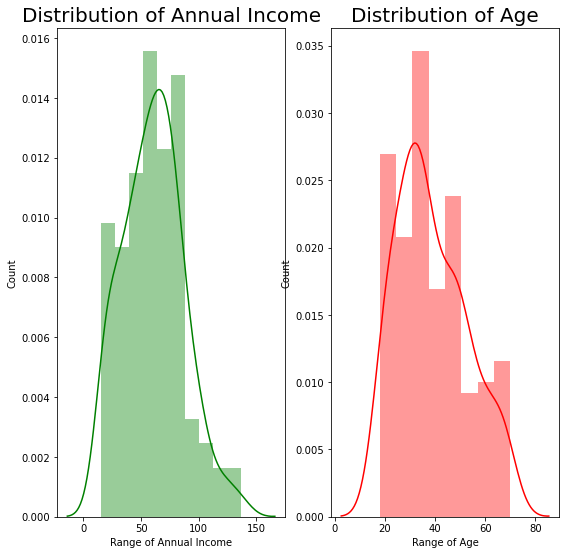

In [16]:
plt.subplot(1, 2,1)
sns.distplot(df['Annual Income (k$)'],color='green')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2,2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

# We can infer here that there are very few people who are earning more than 100 US Dollars.Most of the people are earning around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars..

# The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

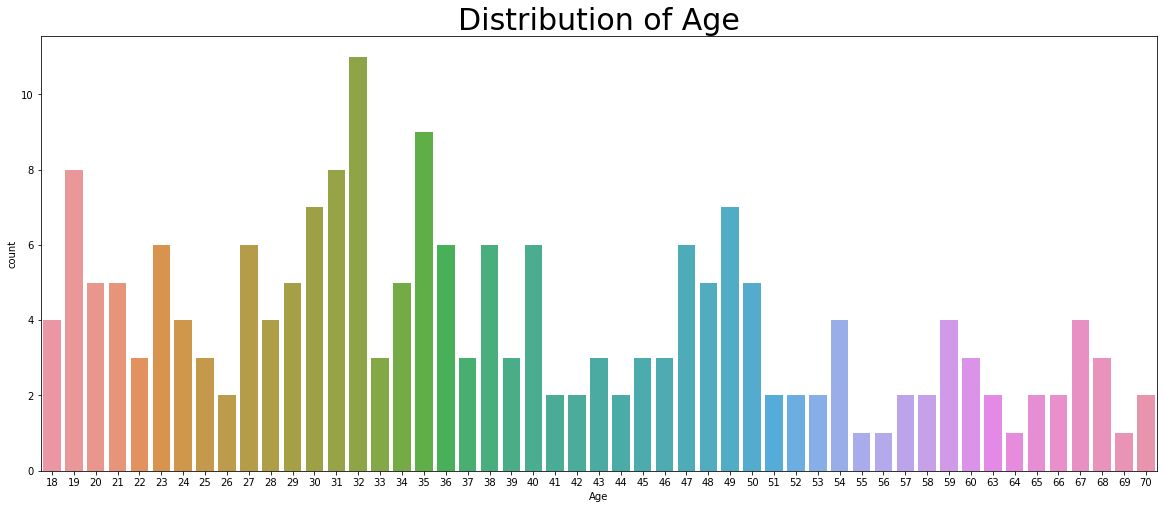

In [17]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Age'])
plt.title('Distribution of Age', fontsize = 30)
plt.show()

# There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

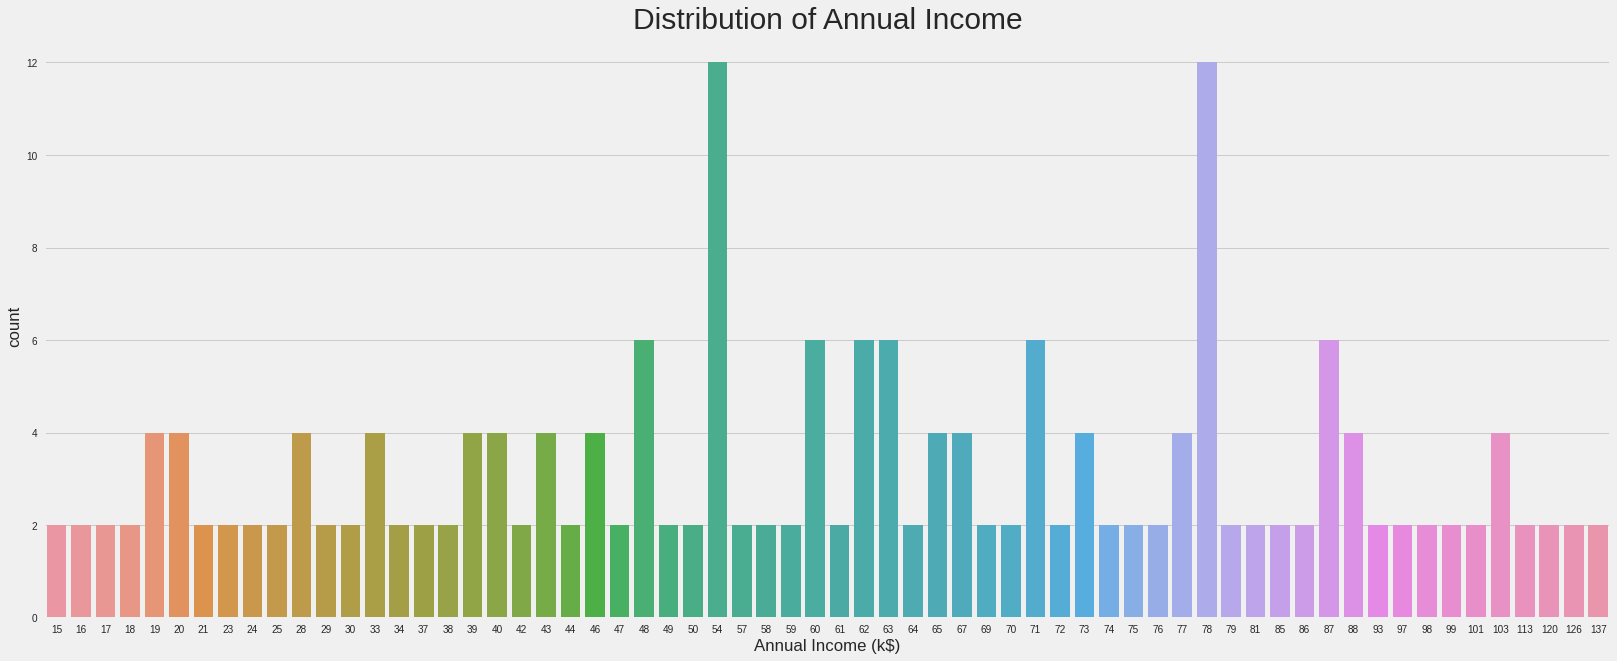

In [54]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.countplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 30)
plt.show()

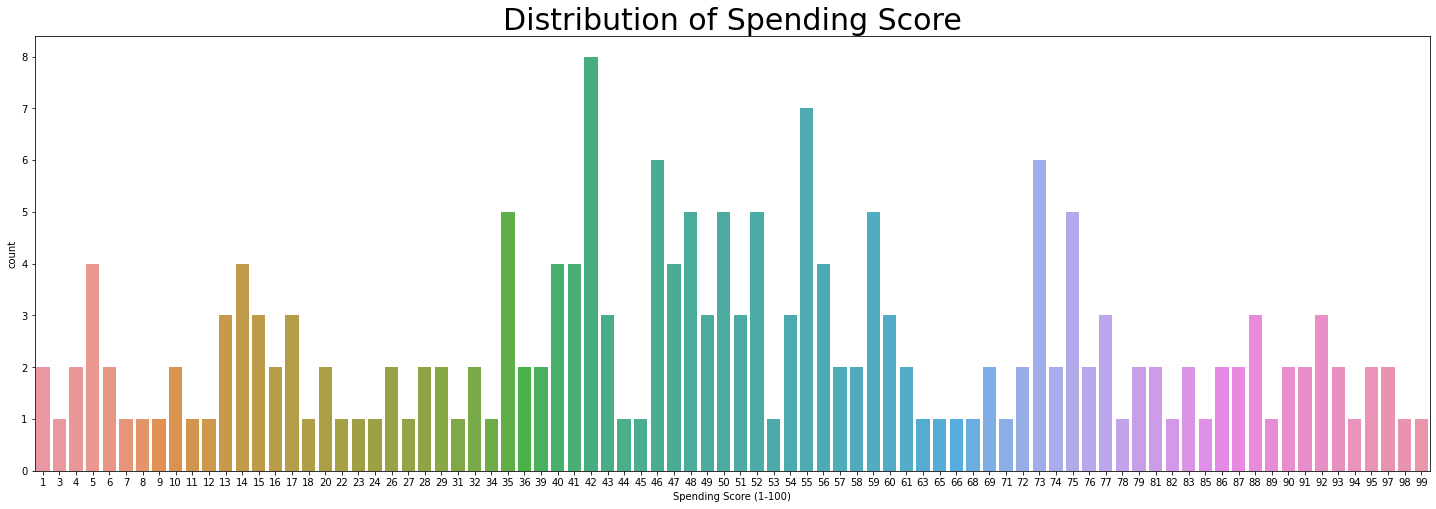

In [19]:
plt.rcParams['figure.figsize'] = (25, 10)
sns.countplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 30)
plt.show()

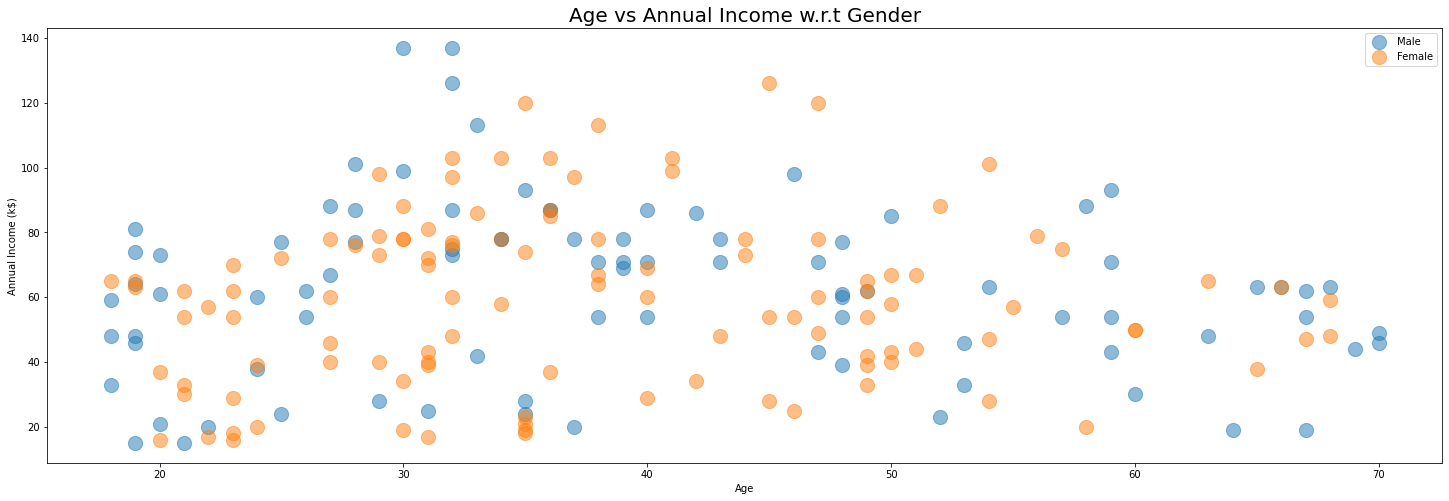

In [20]:
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender',fontsize=20)
plt.legend()
plt.show()

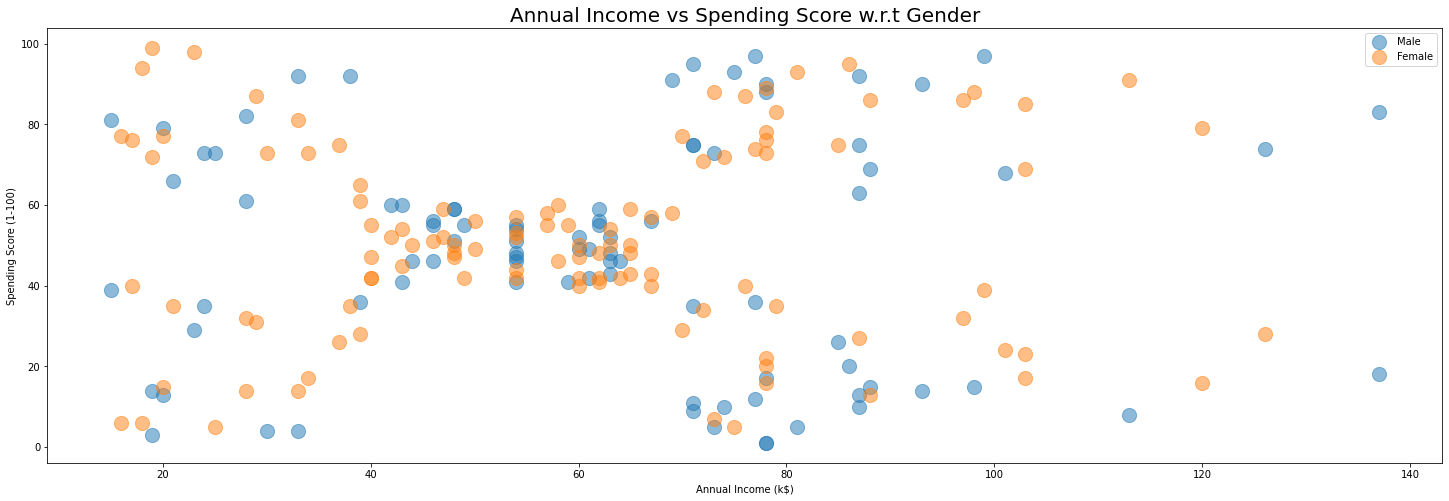

In [21]:
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender',fontsize=20)
plt.legend()
plt.show()

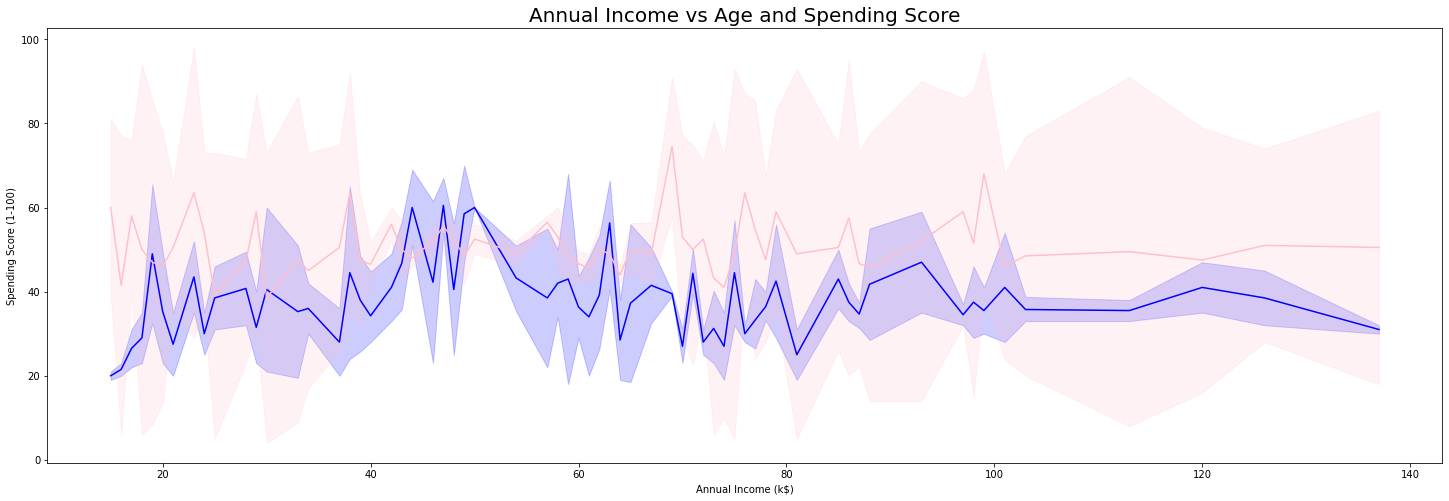

In [22]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

# The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color.Showing how Age and Spending Varies with Annual Income.

In [23]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Selecting Annual Income and Spending Score for K Means Analysis

In [24]:
x = df[['Annual Income (k$)','Spending Score (1-100)']].values
# x

In [25]:
x.shape

(200, 2)

In [26]:
from sklearn.cluster import KMeans

SSD=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    SSD.append(km.inertia_)
    print(km.inertia_)

269981.28
181665.82312925172
106348.37306211118
73679.78903948834
44448.45544793371
37442.24745037571
31280.90384594093
25062.433792653777
21850.165282585633
19669.30155714829


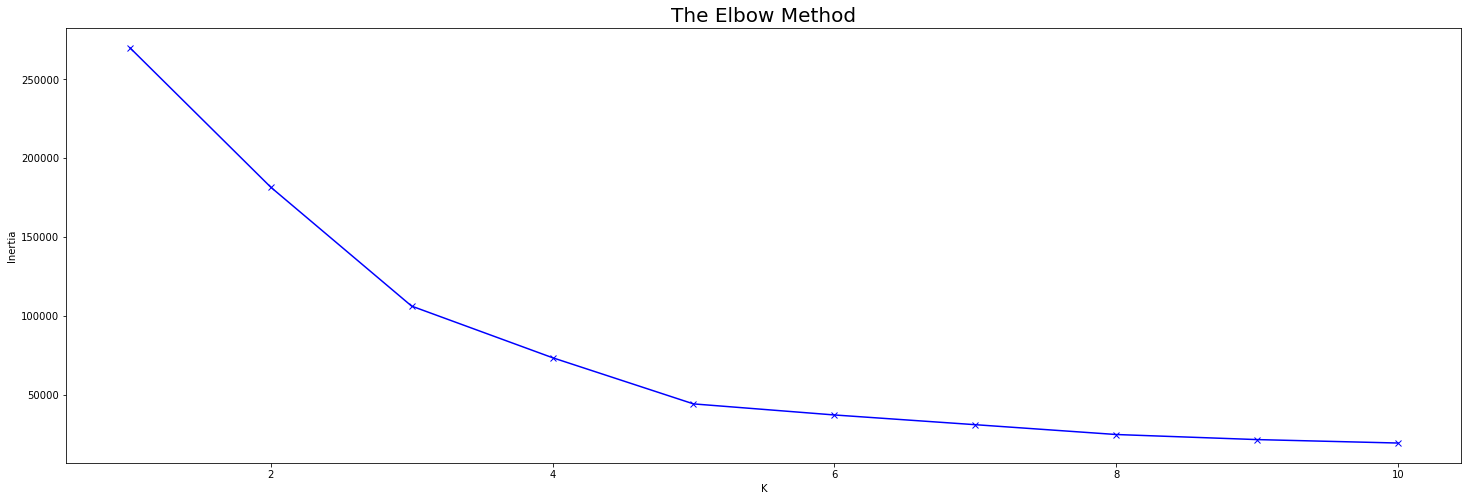

In [27]:
m=range(1,11)

plt.plot(m,SSD,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# So by elbow method we are seeing here that the optimal value of k will be 5.

In [28]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [29]:
y_means

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [30]:
df['class']=y_means
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),class
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,4
197,Male,32,126,74,2
198,Male,32,137,18,4


# Now it is time to visualise the clusters we had created..

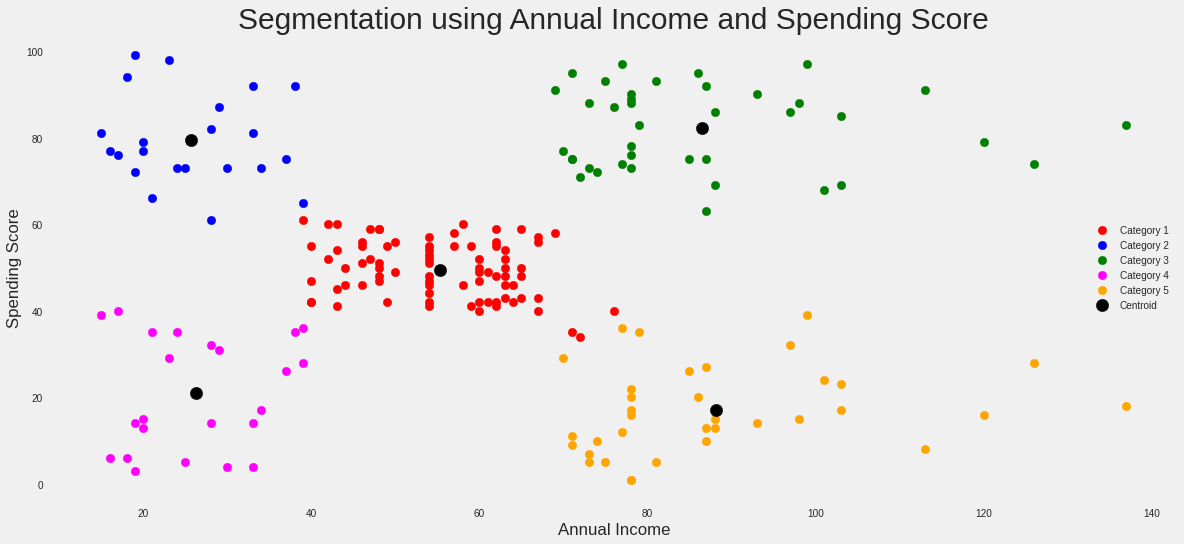

In [53]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 70, c = 'red', label = 'Category 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 70, c = 'blue', label = 'Category 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 70, c = 'green', label = 'Category 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 70, c = 'magenta', label = 'Category 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 70, c = 'orange', label = 'Category 5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'black' , label = 'Centroid')


plt.style.use('fivethirtyeight')
plt.title('Segmentation using Annual Income and Spending Score', fontsize = 30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


# Category 1 - People with decent annual income and spending decent
# Category 2 - People with lowest average income but spending a lot.
# Category 3- People which are getting settled having decent average income and spending more
# Category 4- People with lowest average income and spending less
# Category 5- People with decent average income but spending less

In [32]:
from yellowbrick.cluster import KElbowVisualizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# New elbow method-->

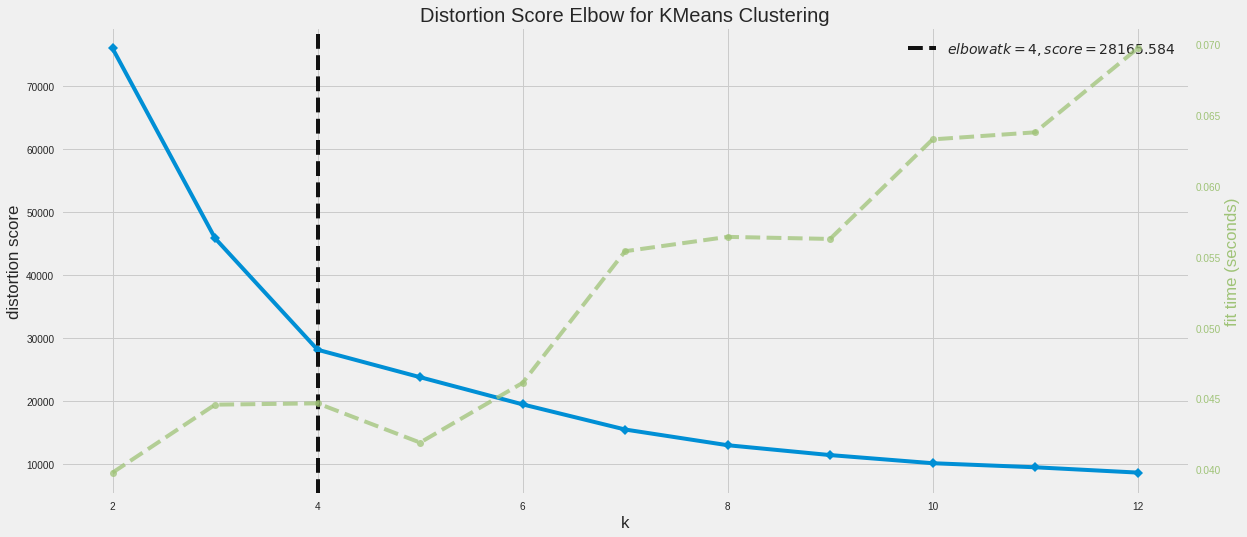

In [52]:
df1 = df[['Age', 'Spending Score (1-100)']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df1)
algorithm.show()

In [34]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_m = algorithm.fit_predict(df1)

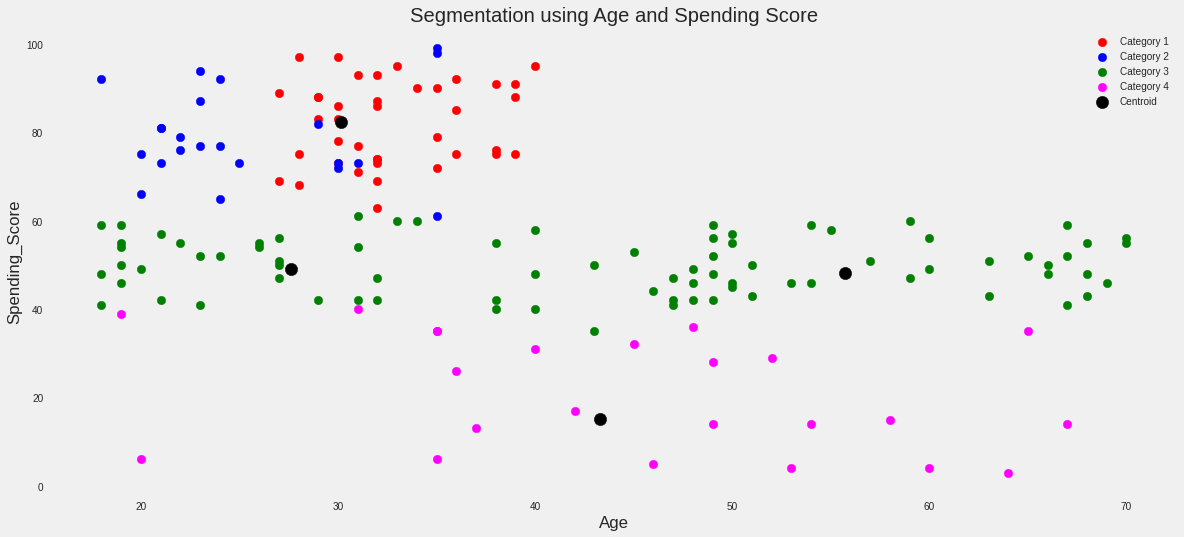

In [51]:
plt.scatter(df1[y_m == 0, 0], df1[y_m == 0, 1], s = 70, c = 'red', label = 'Category 1')
plt.scatter(df1[y_m == 1, 0], df1[y_m == 1, 1], s = 70, c = 'blue', label = 'Category 2')
plt.scatter(df1[y_m == 2, 0], df1[y_m == 2, 1], s = 70, c = 'green', label = 'Category 3')
plt.scatter(df1[y_m == 3, 0], df1[y_m == 3, 1], s = 70, c = 'magenta', label = 'Category 4')

plt.scatter(centroids1[:,0], centroids1[:, 1], s = 150, c = 'black' , label = 'Centroid')

plt.rcParams["figure.figsize"] = (18,8)
plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending_Score')
plt.title('Segmentation using Age and Spending Score')
plt.legend()
plt.grid()
plt.show()

# Category 1 - People with average age of 55 are spending decently.
# Category 2 - People with average age of 30 are spending a lot.
# Category 3-  People with average age of 28 are spending a lot.
# Category 4-People with average age of 45 but spending less.

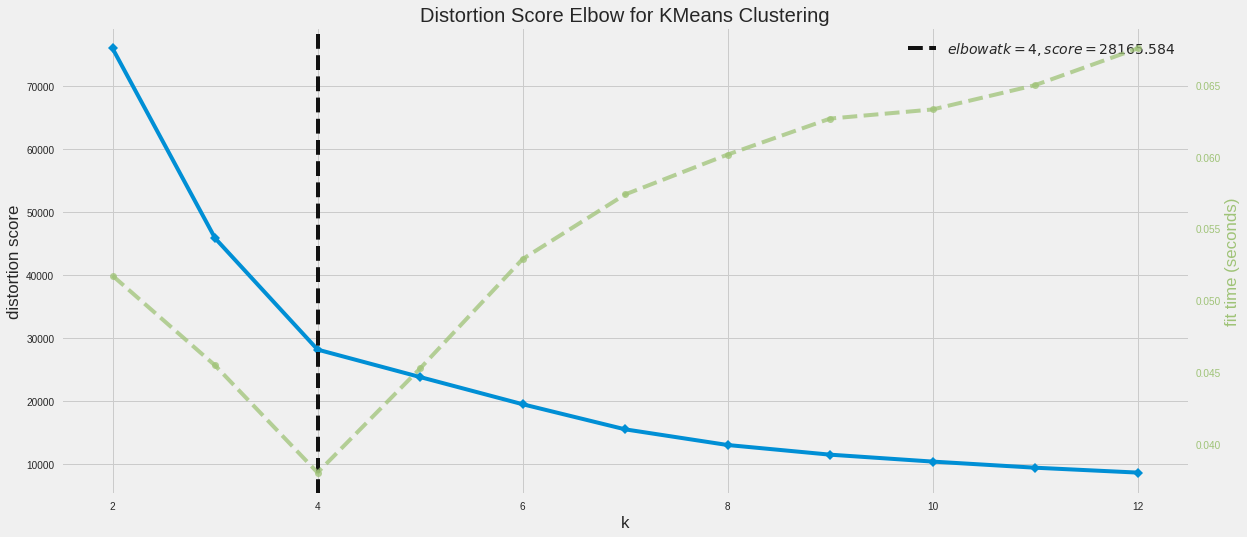

In [36]:
df2 = df[['Age', 'Annual Income (k$)']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df1)
algorithm.show()

In [37]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df1)
labels1 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
y_m = algorithm.fit_predict(df2)

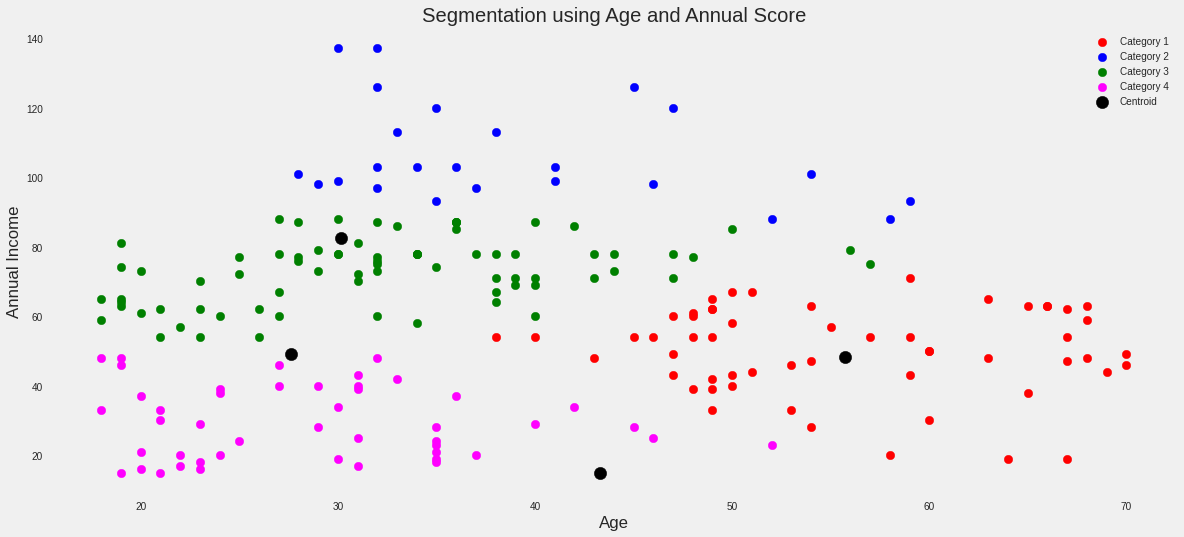

In [38]:
plt.scatter(df2[y_m == 0, 0], df2[y_m == 0, 1], s = 70, c = 'red', label = 'Category 1')
plt.scatter(df2[y_m == 1, 0], df2[y_m == 1, 1], s = 70, c = 'blue', label = 'Category 2')
plt.scatter(df2[y_m == 2, 0], df2[y_m == 2, 1], s = 70, c = 'green', label = 'Category 3')
plt.scatter(df2[y_m == 3, 0], df2[y_m == 3, 1], s = 70, c = 'magenta', label = 'Category 4')

plt.scatter(centroids2[:,0], centroids2[:, 1], s = 150, c = 'black' , label = 'Centroid')

plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Segmentation using Age and Annual Score')
plt.legend()
plt.grid()
plt.show()

# # Category 1 - People with average age of 45 have low Annual income.
# Category 2 - People with average age of 57 have decent Annual Income.
# Category 3-  People with average age of 28 have decent Annual Income.
# Category 4-People with average age of 32 have high Annual Income.

# Segmentation using Age , Annual Income and Spending Score

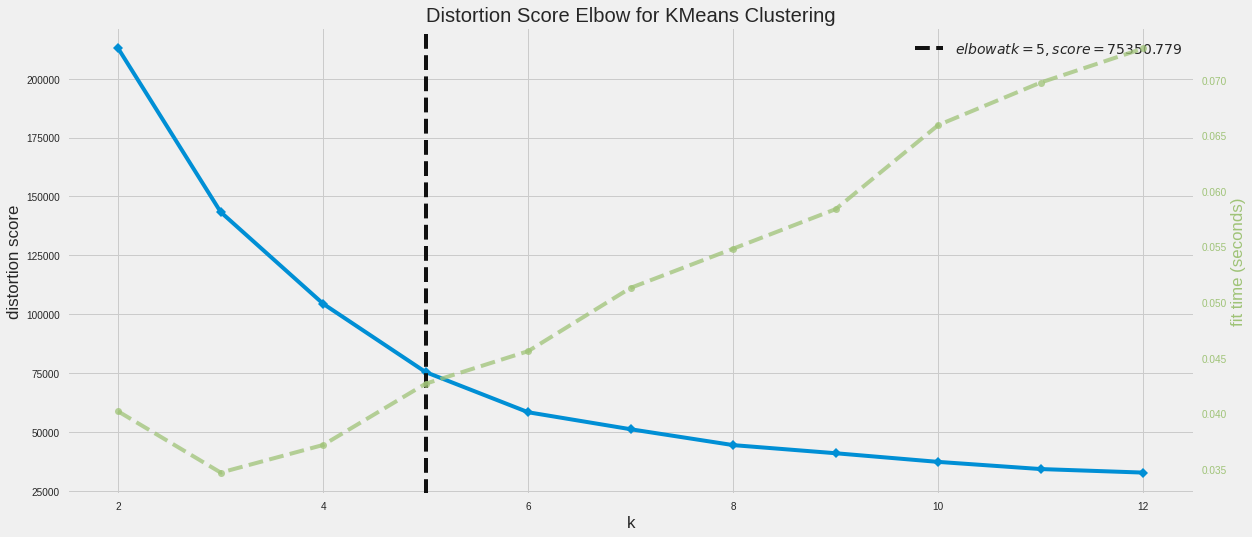

In [39]:
df3 = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df3)
algorithm.show()

In [40]:
import plotly.graph_objs as go
import plotly as py

In [41]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df1)
labels1 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
y_m = algorithm.fit_predict(df3)

In [50]:
df['Cluster'] =  labels1
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['Cluster'], 
        size= 30,
        line=dict(
            color= df['Cluster'],
            width= 18
        ),
        opacity=0.8
     )
)
data1 = [trace1]
layout = go.Layout(
title= 'Clusters in 3-D',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data1, layout=layout)
py.offline.iplot(fig)

# Conclusion-->

# Cluster 1 (average age: 22) — People with lowest average income but spending a lot
# Cluster 2 (average age: 42) — People settled down (have a family) with decent average income but spending less
# Cluster 3 (average age: 32) — People which are getting settled having decent average income and spending more
# Cluster 4 (average age: 45) — People settled down (have a family) with lowest average income and spending less
# Cluster 5 (average age: 43) — People settled down (have a family) with decent annual income and spending decent

Sorry if this plotly plot is not visible please download the code and run it in your local machine..

# HIERARCHIAL CLUSTERING-->

Dendrogram : It is a plot between Euclidean distance (y-axis) and data points (x-axis)

In [43]:
import scipy.cluster.hierarchy as sch

In [44]:
# x

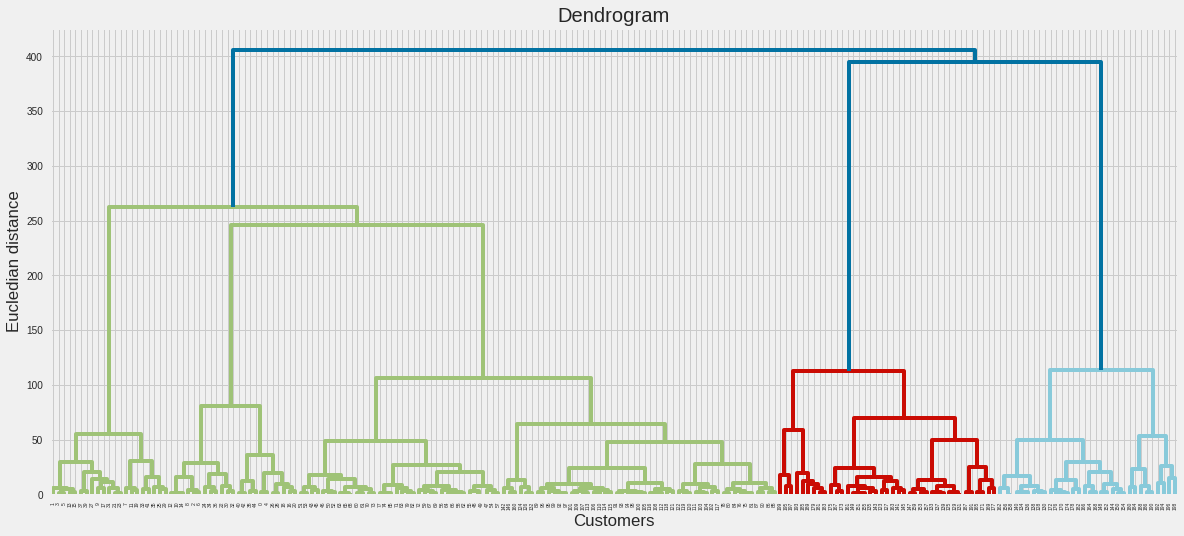

In [45]:
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

So the optimal number of clusters = 5

# AGGLOMERATIVE HIERARCHIAL CLUSTERING-->

In [46]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

y=hc.fit_predict(x)

In [47]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

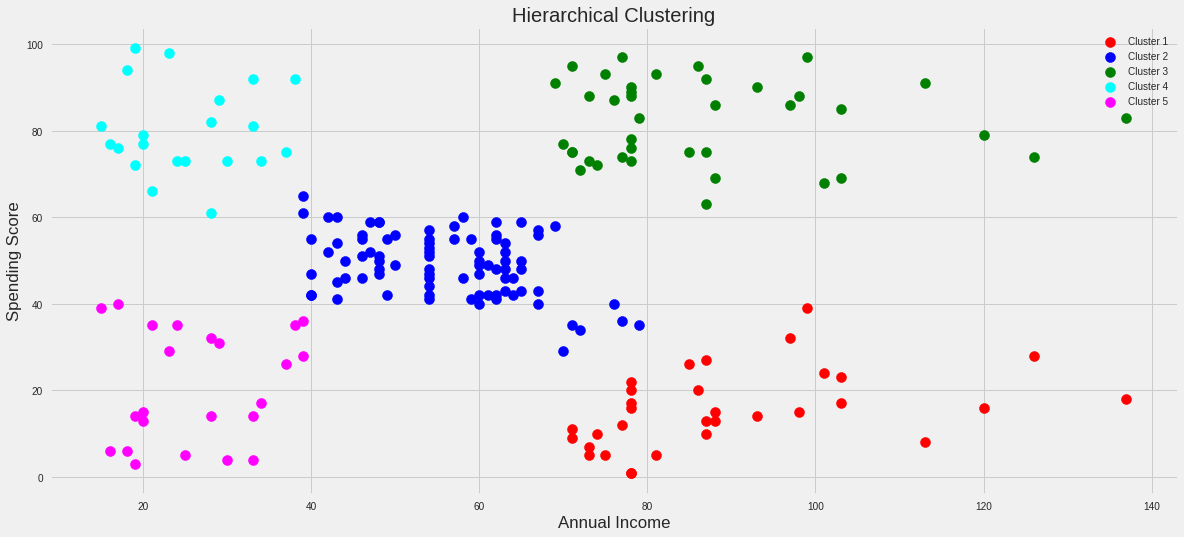

In [49]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')


plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()